In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from xdesign import *
from skimage.exposure import adjust_gamma, rescale_intensity


def rescale(reconstruction, hi):
    I = rescale_intensity(reconstruction, out_range=(0., 1.))
    return adjust_gamma(I, 1, hi)

In [2]:
wet = WetCircles()
sidebyside(wet, size=600)
plt.savefig('Wet_sidebyside.png', dpi='figure',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show(block=True)

NameError: name 'WetCircles' is not defined

[] 0.14%

/home/beams/B242827/miniconda3/lib/python3.5/site-packages/polytope-0.1.3.dev0+652e7e28995436541650d168fbc1ad8e3701da58-py3.5.egg/polytope/polytope.py:1989: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  range(beg_mi[j],beg_mi[j]+mi[j])


[#########] 99.99%

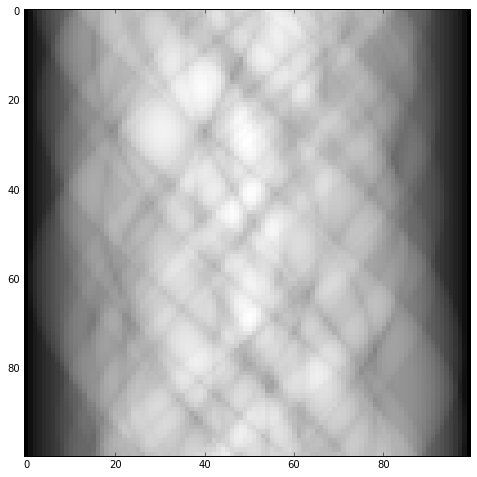

In [2]:
sx, sy = 100, 100
step = 1. / sy
prb = Probe(Point(step / 2., -10), Point(step / 2., 10), step)
theta = np.pi / sx
sino = np.zeros(sx * sy)
a = 0
for m in range(sx):
    for n in range(sy):
        update_progress((m*sy + n)/(sx*sy)*100)
        sino[a] = prb.measure(wet)
        a += 1
        prb.translate(step)
    prb.translate(-1)
    prb.rotate(theta, Point(0.5, 0.5))


plt.figure(figsize=(8, 8))
plt.imshow(np.reshape(sino, (sx, sy)), cmap='gray', interpolation='nearest')
plt.show(block=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


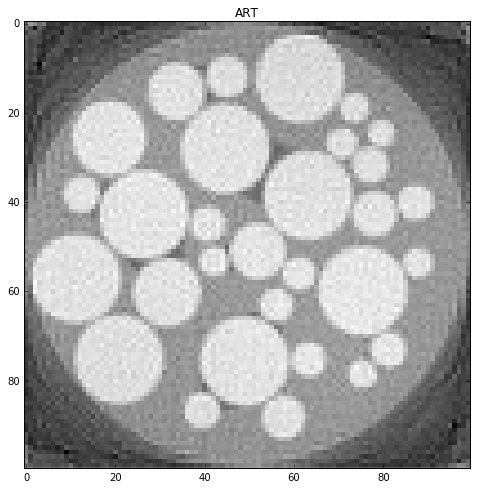

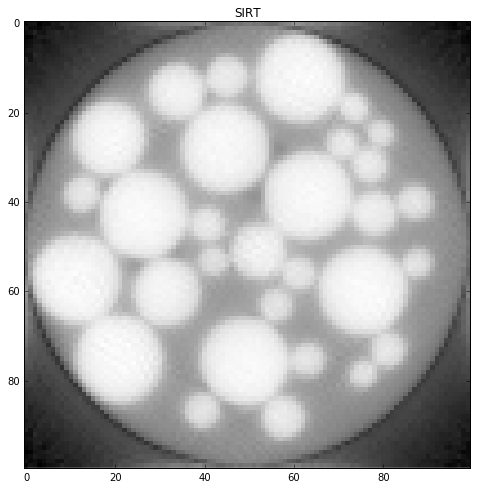

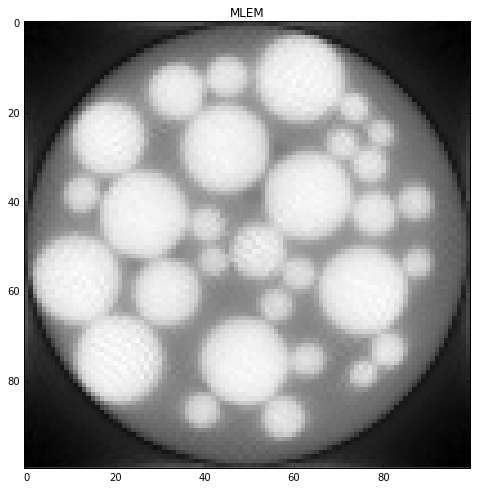

In [5]:
hi = 1
niter = 20
# Reconstruct object.
init = 1e-12 * np.ones((sx, sy))
rec_art = art(prb, sino, init, niter)
rec_art = rescale(np.rot90(rec_art)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_art, cmap='gray', interpolation='none')
plt.title('ART')

init = 1e-12 * np.ones((sx, sy))
rec_sirt = sirt(prb, sino, init, niter)
rec_sirt = rescale(np.rot90(rec_sirt)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_sirt, cmap='gray', interpolation='none')
plt.title('SIRT')

init = 1e-12 * np.ones((sx, sy))
rec_mlem = mlem(prb, sino, init, niter)
rec_mlem = rescale(np.rot90(rec_mlem)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_mlem, cmap='gray', interpolation='none')
plt.title('MLEM')
plt.show()